# Hyothesis Testing on tips dataset

## Chi-Square Test

Chi-Square Test-
The test is applied when you have two categorical variables from a single population. It is used to determine whether there is a significant association between the two variables.
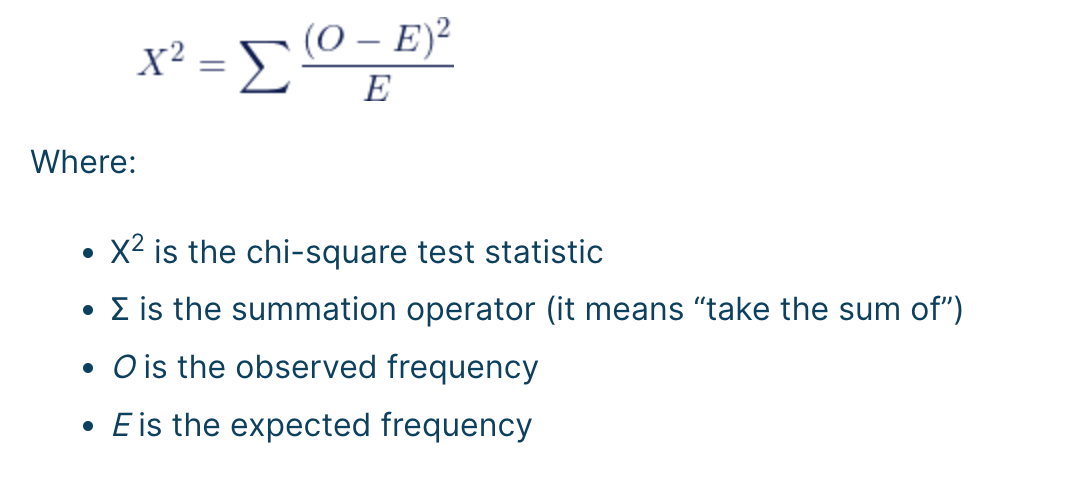

In [1]:
import scipy.stats as stats

In [2]:
import seaborn as sns
import pandas as pd
import numpy as np
dataset=sns.load_dataset('tips')

In [3]:
dataset.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
# Step1:- Pick up the catogarical features.
# crosstab creates a frequency table or cross matrix b/w 2 or more catogrical variable.
dataset_table = pd.crosstab(dataset['sex'], dataset['smoker'])
dataset_table

smoker,Yes,No
sex,,
Male,60,97
Female,33,54


In [8]:
dataset_table.values

array([[60, 97],
       [33, 54]])

In [11]:
#Observed Values
Observed_Values = dataset_table.values 
print("Observed Values :-\n",Observed_Values)

Observed Values :-
 [[60 97]
 [33 54]]


In [12]:

val=stats.chi2_contingency(dataset_table)

In [14]:
# Here we get an array of 2*2 matrix.
val

(0.0,
 1.0,
 1,
 array([[59.84016393, 97.15983607],
        [33.15983607, 53.84016393]]))

In [16]:
val[3]

array([[59.84016393, 97.15983607],
       [33.15983607, 53.84016393]])

In [17]:
# Keep this array inside Expected_Values
Expected_Values=val[3]

In [141]:
# Since we have only 2 rows and columns in dataset table
no_of_rows=len(dataset_table.iloc[0:2,0])
no_of_columns=len(dataset_table.iloc[0,0:2])
ddof=(no_of_rows-1)*(no_of_columns-1)
print("Degree of Freedom:-",ddof)
alpha = 0.05

Degree of Freedom:- 1


Degree of freedom = (no_of_rows-1)*(no_of_columns-1)

In [148]:
no_of_rows

2

In [149]:
no_of_columns

2

In [152]:
from scipy.stats import chi2
chi_square=sum([(o-e)**2./e for o,e in zip(Observed_Values,Expected_Values)]) # It will give 2 chi-square values for 1st and 2nd row
chi_square_statistic=chi_square[0]+chi_square[1]

Here  we are zipping Observed_Values,Expected_Values using zip() function since we have 2*2 matrix and then appling the chi-square formula i.e Σ(observed-expected)^2/expected.

In [143]:
print("chi-square statistic:-",chi_square_statistic)

chi-square statistic:- 0.001934818536627623


### Method 1 
w.r.t critical value

In [144]:

critical_value=chi2.ppf(q=1-alpha,df=ddof)
print('critical_value:',critical_value)

critical_value: 3.841458820694124


In [154]:
if chi_square_statistic>=critical_value:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


### Method 2
w.r.t p value

In [155]:

p_value=1-chi2.cdf(x=chi_square_statistic,df=ddof)
print('p-value:',p_value)
print('Significance level: ',alpha)
print('Degree of Freedom: ',ddof)
print('p-value:',p_value)

p-value: 0.964915107315732
Significance level:  0.05
Degree of Freedom:  1
p-value: 0.964915107315732


In [157]:
if p_value<=alpha:
    print("Reject H0,There is a relationship between 2 categorical variables")
else:
    print("Retain H0,There is no relationship between 2 categorical variables")

Retain H0,There is no relationship between 2 categorical variables


In [ ]:
What is the use of performing this test?
To find the coorelation b/w two features which will help in feature selection.

## T Test

### One-sample T-test with Python
The test will tell us whether means of the sample and the population are different



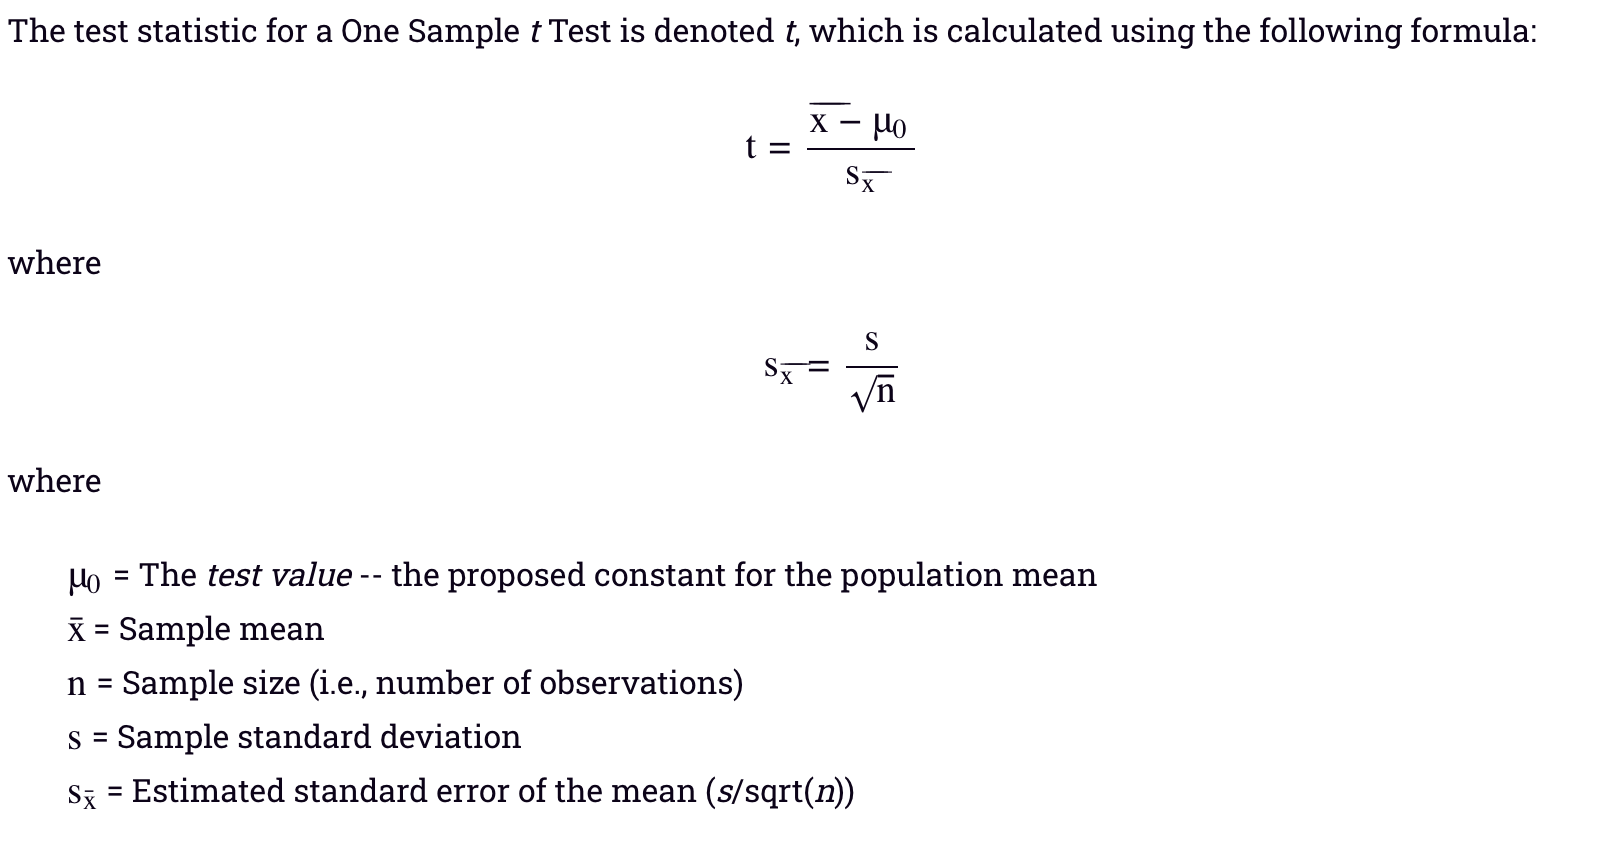

In [18]:
# population age
ages=[10,20,35,50,28,40,55,18,16,55,30,25,43,18,30,28,14,24,16,17,32,35,26,27,65,18,43,23,21,20,19,70]

In [21]:
len(ages)

32

In [23]:
# Caluulate mean of ages
import numpy as np
ages_mean=np.mean(ages)
print(ages_mean)

30.34375


In [64]:
## Lets take sample
## random.choice:- Generates a random sample from a given 1-D array
# Why are we performing t test here?--> Since sample sizeis 8 i.e <30
sample_size=8
age_sample=np.random.choice(ages,sample_size)

In [57]:
age_sample

array([50, 18, 26, 21, 28, 55, 43, 23])

In [58]:
np.mean(age_sample)

33.0

In [59]:
# Import library to perform t-test.
from scipy.stats import ttest_1samp

In [60]:
# Perform t-test on sample and 30 is the mean of population data
# Automatically it gives 2 values one is ttest and p_value
# Here by default confidence interval is 95%. then significance value i.e α = 1-0.95 = 0.05
ttest,p_value=ttest_1samp(age_sample,30)

In [61]:
ttest

0.5966005392134929

In [62]:

print(p_value)

0.5695576347287465


In [63]:
# Here since we are comparing p with 0.05 means α = 0.05 and C.I = 1-0.05 = 0.95 i.e 95%
# if we use want to take C.I = 85% then we need to compare p_value with 0.15.
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we fail to reject the null hypothesis")

we fail to reject the null hypothesis


### Some More Examples
Consider the age of students in a college and in Class A

In [65]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import math
np.random.seed(6)
# Here this both will create a set of data.
school_ages=stats.poisson.rvs(loc=18,mu=35,size=1500)
classA_ages=stats.poisson.rvs(loc=18,mu=30,size=25)


In [94]:
school_ages

array([62, 59, 44, ..., 45, 52, 50])

In [95]:
classA_ages

array([52, 46, 40, 40, 47, 50, 51, 45, 44, 52, 46, 53, 43, 44, 51, 50, 54,
       42, 54, 45, 61, 53, 49, 46, 47])

In [66]:
np.mean(school_ages)

53.303333333333335

In [67]:
classA_ages.mean()

48.2

In [68]:
# pass the sample and population mean as parameter for ttest function.
# _ is just a placeholder here. Since ttest_1samp returns 2 variable.
_,p_value=stats.ttest_1samp(a=classA_ages,popmean=school_ages.mean())

In [69]:
p_value

3.26936314797003e-05

In [70]:
school_ages.mean()

53.303333333333335

In [71]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

 we are rejecting null hypothesis


## Two-sample T-test With Python
The Independent Samples t Test or 2-sample t-test compares the means of two independent groups in order to determine whether there is statistical evidence that the associated population means are significantly different. The Independent Samples t Test is a parametric test. This test is also known as: Independent t Test
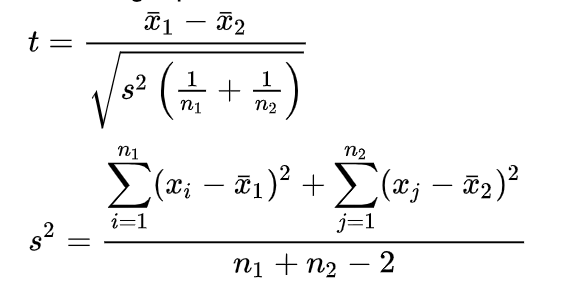

In [73]:
# Here we are applying poission distr on class B. Since we need 2 samples.
np.random.seed(12)
ClassB_ages=stats.poisson.rvs(loc=18,mu=33,size=60)
ClassB_ages.mean()

50.63333333333333

In [96]:
ClassB_ages

array([44, 47, 60, 65, 47, 52, 56, 56, 44, 48, 50, 47, 55, 49, 50, 50, 50,
       41, 53, 47, 39, 50, 52, 43, 53, 51, 59, 53, 51, 46, 41, 53, 63, 53,
       48, 65, 63, 54, 49, 53, 48, 45, 49, 59, 50, 51, 56, 45, 56, 43, 43,
       47, 54, 48, 45, 41, 60, 48, 51, 49])

In [74]:
# perform 2-ttest on both Class A, and class B
_,p_value=stats.ttest_ind(a=classA_ages,b=ClassB_ages,equal_var=False)

In [75]:
p_value

0.06021969607248894

In [76]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


## Paired T-test With Python
When you want to check how different samples from the same group are, you can go for a paired T-test

In [77]:

weight1=[25,30,28,35,28,34,26,29,30,26,28,32,31,30,45]
weight2=weight1+stats.norm.rvs(scale=5,loc=-1.25,size=15)

In [86]:
print(weight1)
print(weight2)

[25, 30, 28, 35, 28, 34, 26, 29, 30, 26, 28, 32, 31, 30, 45]
[30.57926457 34.91022437 29.00444617 30.54295091 19.86201983 37.57873174
 18.3299827  21.3771395  36.36420881 32.05941216 26.93827982 29.519014
 26.42851213 30.50667769 41.32984284]


In [87]:
weight_df=pd.DataFrame({"weight_10":np.array(weight1),
                         "weight_20":np.array(weight2),
                       "weight_change":np.array(weight2)-np.array(weight1)})

In [88]:
weight_df

,weight_10,weight_20,weight_change
0,25,30.579265,5.579265
1,30,34.910224,4.910224
2,28,29.004446,1.004446
3,35,30.542951,-4.457049
4,28,19.862020,-8.137980
5,34,37.578732,3.578732
6,26,18.329983,-7.670017
7,29,21.377139,-7.622861
8,30,36.364209,6.364209
9,26,32.059412,6.059412


In [90]:
# perform t test on weight1 and weight 2 and get the p_value
_,p_value=stats.ttest_rel(a=weight1,b=weight2)

In [91]:
p_value

0.5732936534411279

In [92]:
if p_value < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
else:
    print("we are accepting null hypothesis")

we are accepting null hypothesis


Observation:- Here it lies inside th CI hence we are accepting the null hypothesis.

## Correlation

In [97]:
import seaborn as sns
df=sns.load_dataset('iris')

In [102]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [98]:
df.shape

(150, 5)

In [99]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


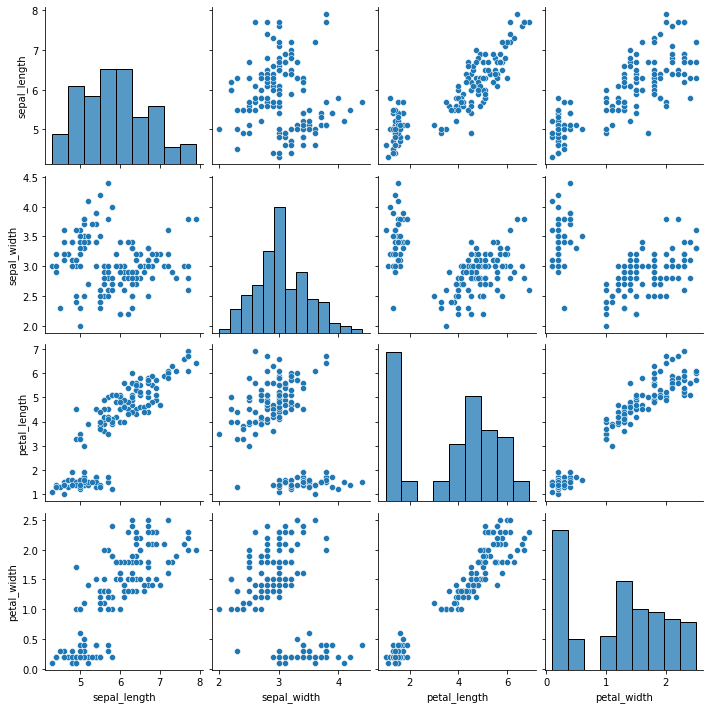

In [100]:
sns.pairplot(df)

## Anova Test(F-Test)
The t-test works well when dealing with two groups, but sometimes we want to compare more than two groups at the same time.

For example, if we wanted to test whether petal_width age differs based on some categorical variable like species, we have to compare the means of each level or group the variable

## One Way F-test(Anova) :-
It tell whether two or more groups are similar or not based on their mean similarity and f-score.

Example : there are 3 different category of iris flowers and their petal width and need to check whether all 3 group are similar or not

In [103]:
import seaborn as sns
df1=sns.load_dataset('iris')

In [104]:
df1.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [109]:
df_anova = df1[['petal_width','species']]

In [115]:
grps = pd.unique(df_anova.species.values)

In [118]:
grps

array(['setosa', 'versicolor', 'virginica'], dtype=object)

Observation:- Total there are 3 types of species of flower i.e 'setosa', 'versicolor' and'virginica'

In [121]:
# based on groups we are displaying all the petal width using Dictionary comprehension
d_data = {grp:df_anova['petal_width'] [df_anova.species == grp] for grp in grps}

In [122]:
d_data

{'setosa': 0     0.2
 1     0.2
 2     0.2
 3     0.2
 4     0.2
 5     0.4
 6     0.3
 7     0.2
 8     0.2
 9     0.1
 10    0.2
 11    0.2
 12    0.1
 13    0.1
 14    0.2
 15    0.4
 16    0.4
 17    0.3
 18    0.3
 19    0.3
 20    0.2
 21    0.4
 22    0.2
 23    0.5
 24    0.2
 25    0.2
 26    0.4
 27    0.2
 28    0.2
 29    0.2
 30    0.2
 31    0.4
 32    0.1
 33    0.2
 34    0.2
 35    0.2
 36    0.2
 37    0.1
 38    0.2
 39    0.2
 40    0.3
 41    0.3
 42    0.2
 43    0.6
 44    0.4
 45    0.3
 46    0.2
 47    0.2
 48    0.2
 49    0.2
 Name: petal_width, dtype: float64,
 'versicolor': 50    1.4
 51    1.5
 52    1.5
 53    1.3
 54    1.5
 55    1.3
 56    1.6
 57    1.0
 58    1.3
 59    1.4
 60    1.0
 61    1.5
 62    1.0
 63    1.4
 64    1.3
 65    1.4
 66    1.5
 67    1.0
 68    1.5
 69    1.1
 70    1.8
 71    1.3
 72    1.5
 73    1.2
 74    1.3
 75    1.4
 76    1.4
 77    1.7
 78    1.5
 79    1.0
 80    1.1
 81    1.0
 82    1.2
 83    1.6
 84    1.5
 85  

In [126]:
# Perform Anova test on 3 different species of iris dataset i.e 'setosa', 'versicolor' and 'virginica'
F, p = stats.f_oneway(d_data['setosa'], d_data['versicolor'], d_data['virginica'])

In [127]:
# p value
print(p)

4.169445839443116e-85


In [125]:
if p<0.05:
    print("reject null hypothesis")
else:
    print("accept null hypothesis")

reject null hypothesis


Conclusion:- Petal width is different in all the species.

## Z Test

In [139]:
# imports
import math
import numpy as np
from numpy.random import randn
from statsmodels.stats.weightstats import ztest

# Using these values Generate a random array of 50 numbers having mean 110 and sd 15
# Here n = 50, µ = 110, σ = 15, CI = 95%
mean_iq = 110 # population mean
sd_iq = 15/math.sqrt(50) # this is σ/√n
alpha =0.05 # Significance value(α) = 1-0.95= 0.05
null_mean =100 # Sample mean
data = sd_iq*randn(50)+mean_iq # Generate data where n = 50

In [136]:
sd_iq

2.1213203435596424

In [137]:
# 50 data having mean = 0 and sd = 1.
randn(50)

array([-1.29468375, -0.56622069, -0.51770921, -0.39587831, -0.60369525,
        0.36739289, -0.95901181, -1.59529672,  0.50752268, -0.61837052,
        0.79079299, -0.83440503,  1.30946996, -1.23874208, -1.20273749,
        0.6961466 ,  1.77898441, -0.79631728,  1.56983921,  1.52166351,
        0.7899156 , -0.21722089, -2.18405985, -1.56726841, -0.80967026,
        0.50049511, -0.19350985, -0.6642032 ,  0.08352685, -1.65842528,
        0.38011359, -0.95667303,  1.26985899,  0.15051938, -0.76513136,
       -0.53702036, -1.6112949 ,  0.16498885, -1.01077622, -0.11539937,
        1.14003868,  0.33800244,  0.47551446,  2.63904608,  0.69110757,
        1.11123557, -0.25768432, -1.19595129,  0.22454703, -1.1634669 ])

In [134]:
data

array([104.44321553, 111.56775404, 111.41598357, 110.09843486,
       111.41296396, 112.98670976, 110.10850381, 108.01449749,
       106.09866001, 110.13529511, 108.48544495, 108.80806263,
       107.59767079, 110.58185908, 111.56110533, 110.9213292 ,
       107.62403402, 111.88605448, 110.66716998, 104.72214552,
       111.26411306, 105.68128445, 107.58533997, 112.2435981 ,
       111.38473118, 108.63287936, 108.12589389, 110.73332426,
       106.18835336, 110.87124667, 109.38094898, 111.55736234,
       109.73378349, 107.69090586, 110.42899657, 109.25788917,
       106.9850164 , 107.53165639, 107.86451711, 110.10611218,
       111.62372252, 109.93951081, 107.44243946, 109.19062116,
       111.20245694, 112.28537636, 108.00519791, 110.60162156,
       109.17200522, 105.430412  ])

In [135]:
data.shape

(50,)

In [129]:
# print mean and sd of data we generated
print('mean=%.2f stdv=%.2f' % (np.mean(data), np.std(data)))

mean=109.35 stdv=2.10


In [140]:
# now we perform the test. In this function, we passed data, in the value parameter
# we passed mean value in the null hypothesis, in alternative hypothesis we check whether the
# mean is larger

ztest_Score, p_value= ztest(data,value = null_mean)
# the function outputs a p_value and z-score corresponding to that value, we compare the
# p-value with alpha, if it is greater than alpha then we do not null hypothesis
# else we reject it.

if(p_value < alpha):
    print("Reject Null Hypothesis")
else:
    print("Fail to Reject NUll Hypothesis")

Reject Null Hypothesis
